In [1]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_blobs
from matplotlib.pyplot import figure
from pandas import DataFrame

# SVM Based Classification

In [2]:
from sklearn.model_selection import train_test_split  
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

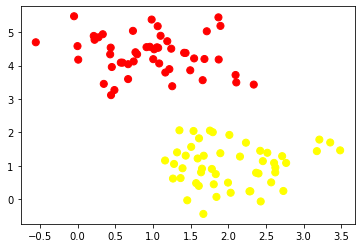

In [3]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [5]:
model=SVC(C=5)

In [6]:
model.fit(X_train, y_train) # to train data

SVC(C=5)

In [7]:
model.score(X_test, y_test) # testing the accuracy

1.0

In [ ]:
y_pred = model.predict(X_test)

cm=confusion_matrix(y_test, y_pred)
cm

array([[13,  0],
       [ 0,  7]])

Text(42.0, 0.5, 'Truth')

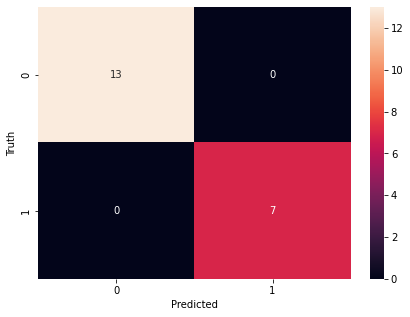

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## SVR

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
 
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/BankChurners.csv")

In [10]:
x = pd.DataFrame(data[["Credit_Limit", "Avg_Utilization_Ratio"]])  

In [11]:
x

,Credit_Limit,Avg_Utilization_Ratio
0,12691.0,0.061
1,8256.0,0.105
2,3418.0,0.000
3,3313.0,0.760
4,4716.0,0.000
...,...,...
10122,4003.0,0.462
10123,4277.0,0.511
10124,5409.0,0.000
10125,5281.0,0.000


In [ ]:
# from sklearn import preprocessing
# le= preprocessing.LabelEncoder()
# x['Card_Category']=le.fit_transform(x['Income_Category'])

In [12]:
x.iloc[:, [0]] = MinMaxScaler().fit_transform(x.iloc[:, [0]])

In [13]:
x = x.iloc[:200, :]
x.head()

,Credit_Limit,Avg_Utilization_Ratio
0,0.340190,0.061
1,0.206112,0.105
2,0.059850,0.000
3,0.056676,0.760
4,0.099091,0.000


In [14]:
#Extracting independent and dependent variable  
X= x.iloc[:, [0]].values  
Y= x.iloc[:, [1]].values  

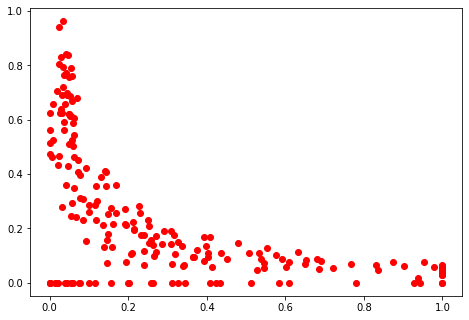

In [15]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X,Y,color='red')

In [16]:
from sklearn.svm import SVR

In [17]:
regressor=SVR(kernel='rbf')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [20]:
regressor.fit(X_train,y_train)
print(regressor.score(X_test, y_test))

0.4383937630736374


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


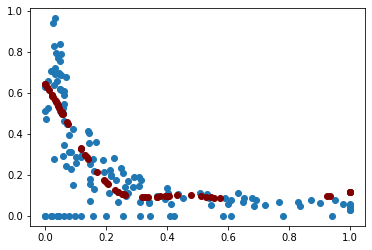

In [ ]:
plt.scatter(X_train, y_train)
plt.scatter(X_test,regressor.predict(X_test),color='maroon')

In [ ]:
regressor.score(X_test, y_test)

0.4383937630736374